We have derived the energy spectra of Kitaev ladder in the Majorana representation after Jordan Wigner transformation.

$$\epsilon(k)=\pm \sqrt{(J_z + (J_x + D J_y)\cos k)^2 + (J_x - D J_y)^2\sin^2k}$$



And the real energy at thermal dynamic limit should be the numerical integral of this function.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from analytic_spin_half import energy_true
from utility import linspace

In [8]:
ks = np.arange(-np.pi, np.pi, .01)
es = [energy_true(k=k) for k in ks]

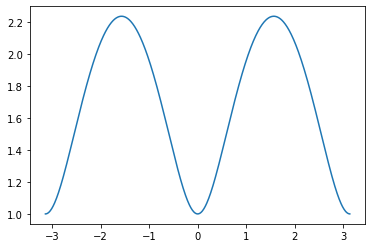

In [9]:
plt.plot(ks, es)

In [2]:
import scipy as sp

In [11]:
from scipy import integrate
from scipy.integrate import quad

In [16]:
quad(lambda x:(energy_true(Jx=0, Jy=0, Jz=1, k=x) / np.pi), 0, np.pi)

(1.0, 1.1102230246251565e-14)

In [17]:
import time

In [22]:
begin = time.time()

for J in linspace(0, 2, 201):
    quad(lambda x:(energy_true(Jx=J, Jy=J, Jz=1, k=x) / np.pi), 0, np.pi)

end = time.time()
print(f'Elapsed time: {(end-begin)*1000} ms')

Elapsed time: 54.35681343078613 ms


In [25]:
begin = time.time()

Jx_list = linspace(0, 2, 201)
Jy_list = linspace(0, 2, 201)
X, Y = np.meshgrid(Jx_list, Jy_list)

E_analytic = np.zeros_like(X)
E_analytic_error = np.zeros_like(X)

for i in range(201):
    for j in range(201):
        Jx = X[i, j]
        Jy = Y[i, j]
        E_analytic[i, j] ,E_analytic_error[i, j] = quad(lambda k:(energy_true(Jx=Jx, Jy=Jy, Jz=1, k=k) / np.pi), 0, np.pi)

end = time.time()
print(f'Elapsed time: {(end-begin)*1000} ms')

Elapsed time: 15366.300106048584 ms


In [34]:
E_analytic / 2

array([[0.5       , 0.5000125 , 0.50005   , ..., 1.05420928, 1.05887508,
        1.06354441],
       [0.5000125 , 0.50005   , 0.50011248, ..., 1.05438711, 1.05905102,
        1.0637185 ],
       [0.50005   , 0.50011248, 0.50019994, ..., 1.05457857, 1.05924052,
        1.06390606],
       ...,
       [1.05420928, 1.05438711, 1.05457857, ..., 1.39099901, 1.39396037,
        1.39692965],
       [1.05887508, 1.05905102, 1.05924052, ..., 1.39396037, 1.39691555,
        1.39987863],
       [1.06354441, 1.0637185 , 1.06390606, ..., 1.39692965, 1.39987863,
        1.40283553]])

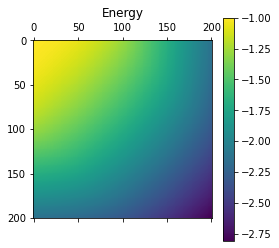

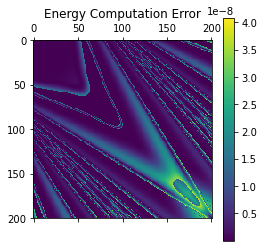

In [32]:
plt.matshow(-E_analytic)
plt.colorbar()
plt.title('Energy')
plt.show()

plt.matshow(E_analytic_error)
plt.colorbar()
plt.title('Energy Computation Error')
plt.show()

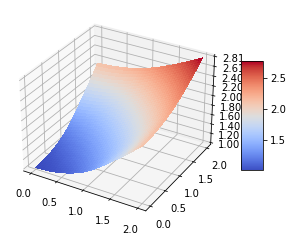

In [33]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = E_analytic

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()